## Regresión lineal


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Regresión lineal simple

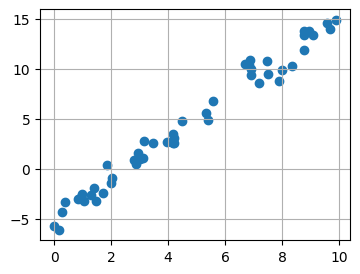

In [39]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)


fig, ax = plt.subplots(figsize = (4,3))
ax.scatter(x, y)
ax.grid(True,'both')
plt.show()

In [25]:
# Dado que x puede recibir una matriz, debemos especificar que se trata de un vector
x = x.reshape((len(x),1))
x[:5]

array([[4.17022005e+00],
       [7.20324493e+00],
       [1.14374817e-03],
       [3.02332573e+00],
       [1.46755891e+00]])

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept= True)

model.fit(x,y)

LinearRegression()

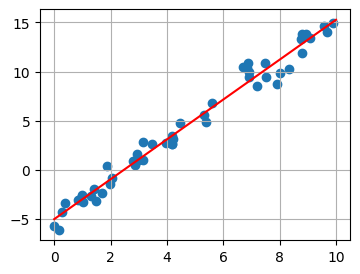

In [38]:
xfit = np.linspace(0,10,1000)
yfit = model.predict(xfit.reshape(len(xfit),1))

fig, ax = plt.subplots(figsize = (4,3))

ax.scatter(x,y)
ax.plot(xfit,yfit, color = 'r')
ax.grid(True, 'both')
plt.show()

In [42]:
print(f'Pendiente del modelo: {model.coef_[0]}')
print(f'Intercepto del modelo: {model.intercept_}')

Pendiente del modelo: 2.0272088103606944
Intercepto del modelo: -4.9985770855532


### Regresión lineal múltiple

In [66]:
X = 10 * rng.rand(100, 2)
y = 0.5 + np.dot(X, [1.5, -2.]) # coeficientes beta

y[:5],X[:5]

(array([ 7.21408981,  0.45479105, -1.93254682,  3.61434239, -9.98205065]),
 array([[6.38278133, 1.4300411 ],
        [8.57738615, 6.45564408],
        [1.15293425, 2.0809741 ],
        [7.45498331, 4.03406628],
        [4.84470061, 8.87455078]]))

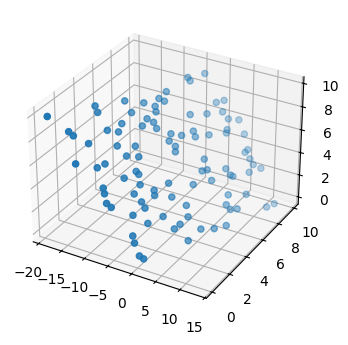

In [67]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y, X[:, 0], X[:, 1])
plt.show()

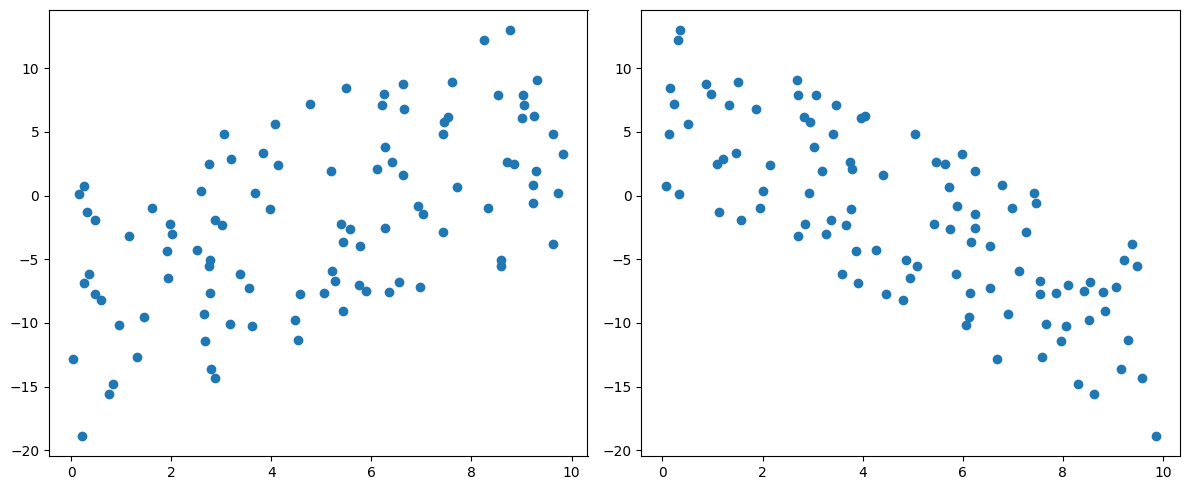

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

axes[0].scatter(X[:, 0], y)
axes[1].scatter(X[:, 1], y)
plt.tight_layout()
plt.show()

In [69]:
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.49999999999999645
[ 1.5 -2. ]


## Regresión de la función base

In [63]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

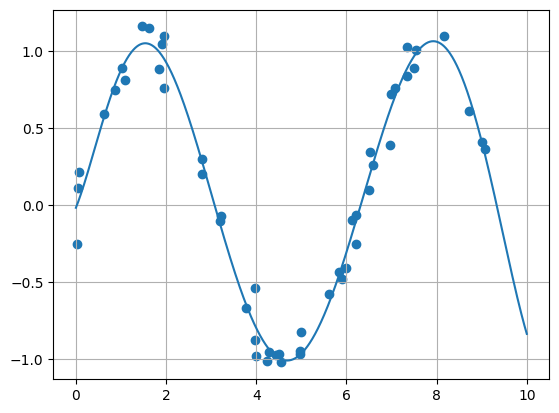

In [65]:
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.grid(True, 'both')
plt.plot(xfit, yfit);

In [ ]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame  # Pandas DataFrame con las variables

In [ ]:
df.shape, df.head()

((20640, 9),
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 
    Longitude  MedHouseVal  
 0    -122.23        4.526  
 1    -122.22        3.585  
 2    -122.24        3.521  
 3    -122.25        3.413  
 4    -122.25        3.422  )

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


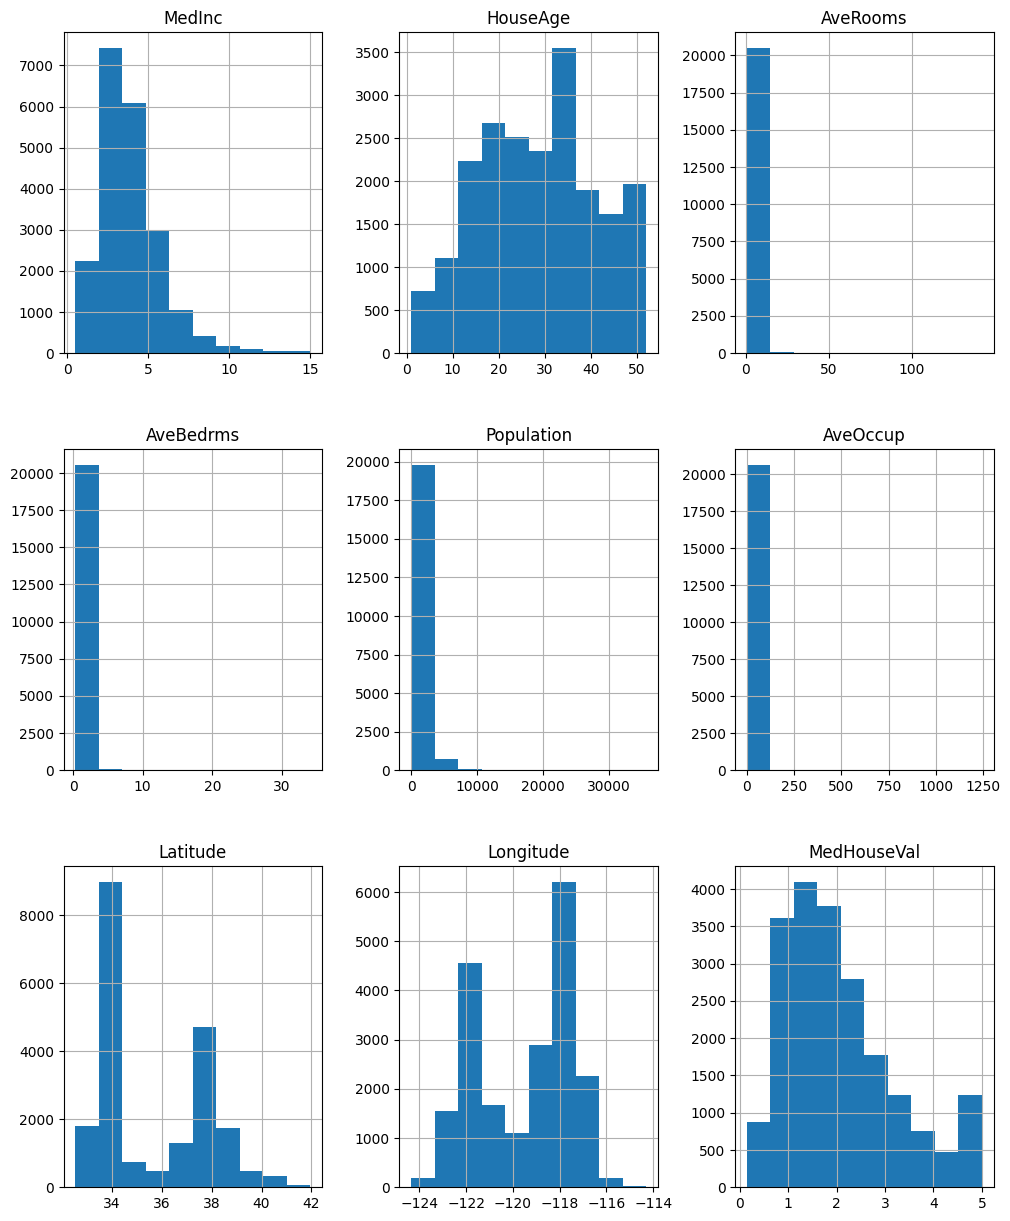

In [103]:
df.hist(figsize=(12, 15));

In [ ]:
# Calcular correlaciones
corr_matrix = df.corr()

# Ordenar de mayor a menor correlación con MedHouseVal
corr_target = corr_matrix["MedHouseVal"].sort_values(ascending=False)
print(corr_target)


MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


In [112]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

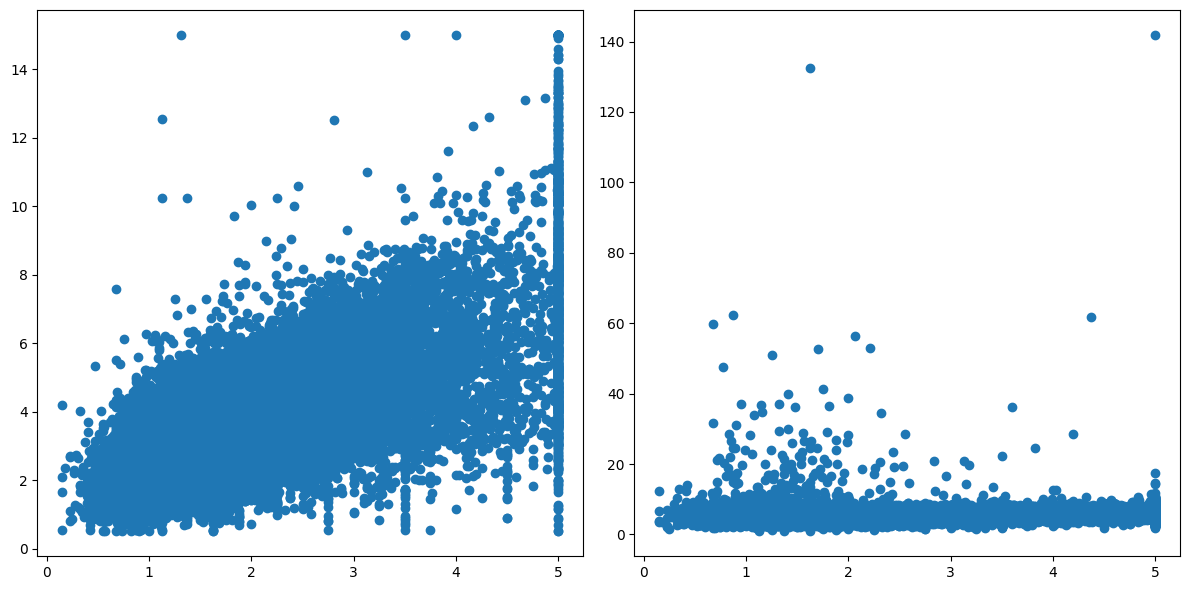

In [115]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

ax[0].scatter(df['MedHouseVal'],df['MedInc'])
ax[1].scatter(df['MedHouseVal'],df['AveRooms'])

plt.tight_layout()
plt.show()


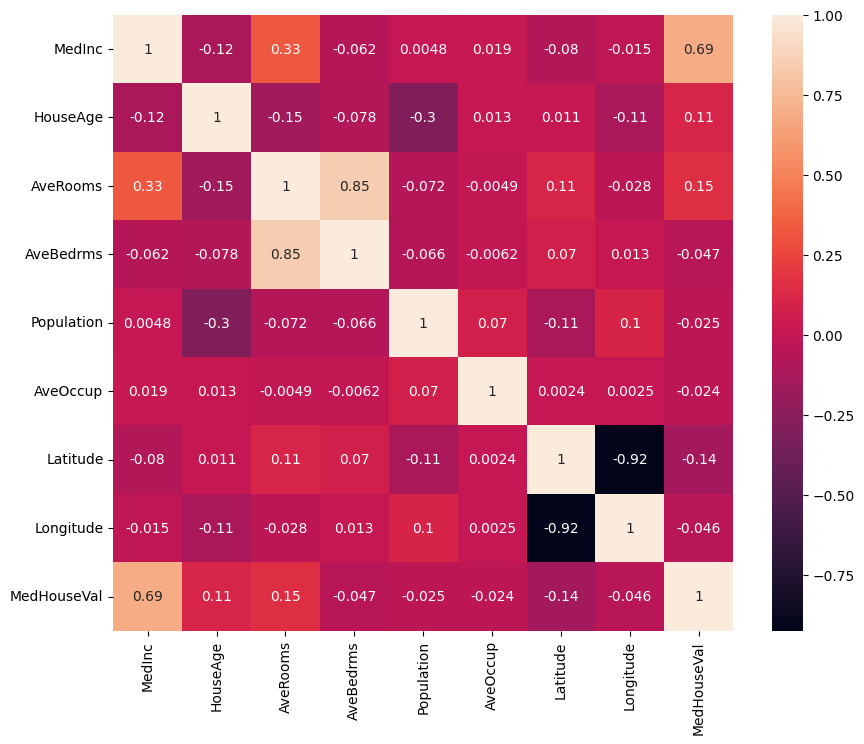

In [105]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True);

In [89]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['MedHouseVal'])  
y = df['MedHouseVal']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [85]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # creo modelo
model.fit(X_train, y_train) # entreno el modelo
y_pred = model.predict(X_test) # Obtengo predicciones

X_test[:5], y_pred[:5]

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 20046  1.6812      25.0  4.192201   1.022284      1392.0  3.877437     36.06   
 3024   2.5313      30.0  5.039384   1.193493      1565.0  2.679795     35.14   
 15663  3.4801      52.0  3.977155   1.185877      1310.0  1.360332     37.80   
 20484  5.7376      17.0  6.163636   1.020202      1705.0  3.444444     34.28   
 9814   3.7250      34.0  5.492991   1.028037      1063.0  2.483645     36.62   
 
        Longitude  
 20046    -119.01  
 3024     -119.46  
 15663    -122.44  
 20484    -118.72  
 9814     -121.93  ,
 array([0.71912284, 1.76401657, 2.70965883, 2.83892593, 2.60465725]))

In [106]:
print(model.intercept_)
print(model.coef_)

2.0719469373788777
[ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]


In [86]:
from sklearn.metrics import mean_squared_error, r2_score

# Métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'R²: {r2:.4f}')


MSE: 0.5559
R²: 0.5758


NameError: name 'reg' is not defined

In [91]:
# Normalización de variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo con datos escalados
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)

# Evaluar nuevamente
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f'MSE con escalado: {mse_scaled:.4f}')
print(f'R² con escalado: {r2_scaled:.4f}')


MSE con escalado: 0.5559
R² con escalado: 0.5758


In [92]:
# Ajuste polinómico

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train_scaled, y_train)

y_pred_poly = poly_model.predict(X_test_scaled)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'MSE Polinómico: {mse_poly:.4f}')
print(f'R² Polinómico: {r2_poly:.4f}')


MSE Polinómico: 0.4643
R² Polinómico: 0.6457
